In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import AdaBoostClassifier

In [45]:
df = pd.read_csv('dataset_clean.csv')

## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
RSEED = 101

In [48]:
df.columns

Index(['Unnamed: 0', 'price', 'res_load', 'temp', 'wind', 'gen_total',
       'gen_bio', 'gen_hyd', 'gen_windoff', 'gen_windon', 'gen_pv',
       'gen_reother', 'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas',
       'gen_pump', 'gen_other', 'gen_f_total', 'gen_f_windoff', 'gen_f_windon',
       'gen_f_pv', 'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'mres-',
       'sres+', 'sres-', 'FF', 'PEGAS DE M1 DAILY EGIX',
       'API4 front year, USD/t', 'gen_delta', 'gen_windoff_delta',
       'gen_windon_delta', 'gen_pv_delta', 'dm_delta', 'dm_gen_delta',
       'dm_gen_ratio', 'day', 'weekend', 'month', 'season', 'hour', 'peak',
       'lag1', 'price_change', 'price_diff', 'price_diff_pos', 'price_pos',
       'price_diff_bins'],
      dtype='object')

In [87]:
X1 = df[['res_load', 'temp', 'wind', 'gen_total',
       'gen_bio', 'gen_hyd', 'gen_windoff', 'gen_windon',
       'gen_reother', 'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas',
       'gen_pump', 'gen_other', 'gen_f_total', 'gen_f_windoff', 'gen_f_windon',
       'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'mres-',
       'FF', 'PEGAS DE M1 DAILY EGIX',
       'API4 front year, USD/t', 'gen_delta', 'gen_windoff_delta',
       'gen_windon_delta', 'dm_delta', 'dm_gen_delta',
       'dm_gen_ratio', 'weekend', 'month', 'hour']]

In [88]:
X = X1
y = df.price_diff_pos

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED, stratify=y)

## Scaling

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## AdaBoost

In [90]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
predictions = ada.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix for AdaBoost Classifier')

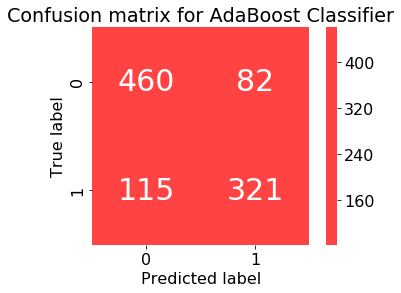

In [91]:
from sklearn.metrics import confusion_matrix

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']

plt.figure()
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size":30}, cmap=colors_r, center=2000, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for AdaBoost Classifier')

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       542
           1       0.80      0.74      0.77       436

    accuracy                           0.80       978
   macro avg       0.80      0.79      0.79       978
weighted avg       0.80      0.80      0.80       978



In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7985685071574642

In [94]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)

0.7924735095974813

## Hyperparameter Tuning via Randomized Search

In [95]:
X = X1
y = df.price_diff_pos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED, stratify=y)

In [96]:
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the classifier
estimator = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=RSEED)

# TODO: Create the parameters list you wish to tune
param_grid = {'n_estimators' : [25, 50], 
              'learning_rate' : [1., 5],
              'base_estimator__min_samples_split' : np.arange(6, 12, 2),
              'base_estimator__max_depth' : np.arange(1, 4, 1)
             }

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_search = RandomizedSearchCV(estimator, param_grid, scoring=scorer, n_jobs = -1,
                                cv = 3, n_iter = 10, verbose = 1, random_state=RSEED)

# TODO: Fit the grid search object to the training data and find the optimal parameters
gs_fit = grid_search.fit(X_train, y_train)

# Get the estimator
gs_fit.best_estimator_

# Make predictions using the unoptimized and model
#predictions = (clf.fit(X_train_s, y_train_s)).predict(X_test_s)
#best_predictions = best_clf.predict(X_test_s)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.4s finished
/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

### Best Model

In [98]:
ada_best = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=1.0, n_estimators=25, random_state=101)
ada_best.fit(X_train, y_train)
predictions = ada_best.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix for AdaBoost Classifier')

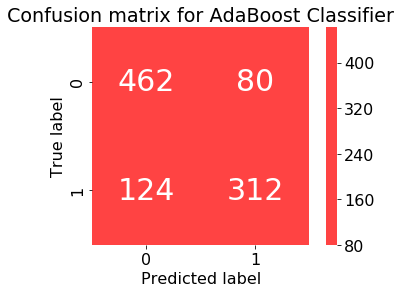

In [99]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']
plt.figure()
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size":30}, cmap=colors_r, center=2000, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for AdaBoost Classifier')

In [100]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       542
           1       0.80      0.72      0.75       436

    accuracy                           0.79       978
   macro avg       0.79      0.78      0.79       978
weighted avg       0.79      0.79      0.79       978



In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7914110429447853

In [102]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)

0.7839974271302347

### Cross Validation

In [103]:
from sklearn.model_selection import cross_val_score
precision = cross_val_score(ada_best, X_train, y_train, cv=5, scoring='precision')
print('precision', np.mean(precision), precision)

precision 0.7502703197651084 [0.73517787 0.75403226 0.76754386 0.77868852 0.71590909]


## Feature Importance

In [104]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X.columns.values[indices[:7]]
    values = importances[indices][:7]

    # Creat the plot
    fig = plt.figure(figsize = (15,8))
    plt.title("Normalized Weights for First Ten Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(7), values, width = 0.5, align="center", color = '#FF4343', \
          label = "Feature Weight")
    plt.bar(np.arange(7) - 0.3, np.cumsum(values), width = 0.5, align = "center", color = 'k', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(10), columns, rotation=70)
    plt.xlim((-0.5, 6.5))
    plt.ylabel("Weight", fontsize = 16)
    plt.xlabel("Feature", fontsize = 16)
    
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('font', size=16)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

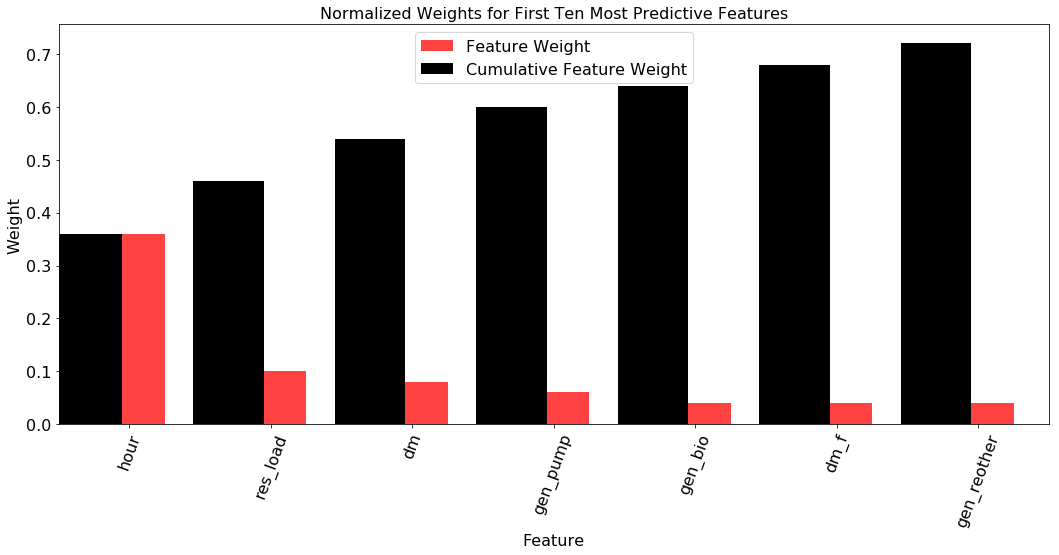

In [105]:
# TODO: Train the supervised model on the training set 
model = AdaBoostClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)